In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
news_train = fetch_20newsgroups(subset='all', shuffle=True, data_home='C:/Users/Tara/scikit_learn_data/new_directory')
print(f"Dataset loaded with {len(news_train.data)} documents and {len(news_train.target_names)} categories.")


Dataset loaded with 18846 documents and 20 categories.


In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(news_train.data)
y = news_train.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
predict = svm.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [12]:
report = classification_report(y_test, predict, target_names=news_train.target_names)
print(report)

                          precision    recall  f1-score   support

             alt.atheism       0.87      0.89      0.88       151
           comp.graphics       0.73      0.83      0.78       202
 comp.os.ms-windows.misc       0.81      0.81      0.81       195
comp.sys.ibm.pc.hardware       0.68      0.75      0.71       183
   comp.sys.mac.hardware       0.85      0.81      0.83       205
          comp.windows.x       0.88      0.84      0.86       215
            misc.forsale       0.81      0.78      0.79       193
               rec.autos       0.89      0.92      0.90       196
         rec.motorcycles       0.96      0.93      0.95       168
      rec.sport.baseball       0.93      0.93      0.93       211
        rec.sport.hockey       0.95      0.95      0.95       198
               sci.crypt       0.97      0.95      0.96       201
         sci.electronics       0.84      0.81      0.82       202
                 sci.med       0.91      0.92      0.92       194
         

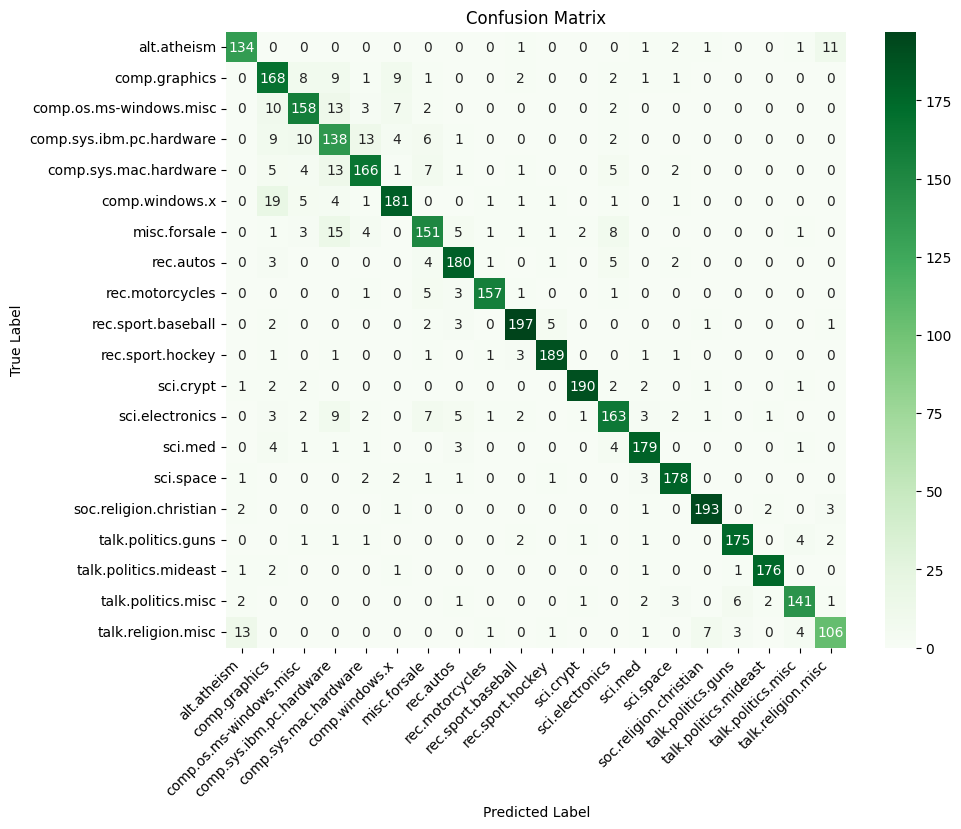

In [21]:
conf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=news_train.target_names, yticklabels=news_train.target_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

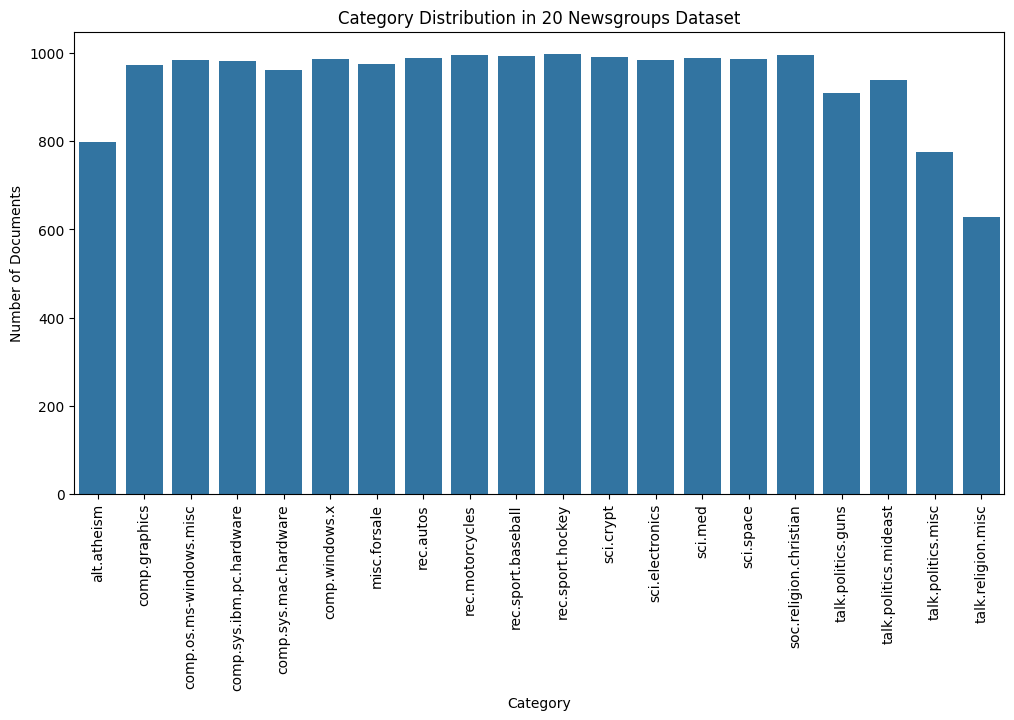

In [23]:
category_distribution = np.bincount(news_train.target)
plt.figure(figsize=(12, 6))
sns.barplot(x=news_train.target_names, y=category_distribution)
plt.title('Category Distribution in 20 Newsgroups Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Documents')
plt.xticks(rotation=90)
plt.show()